In [4]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Styling
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)


In [6]:
#Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [7]:
train.shape

(1460, 81)

In [8]:
test.shape

(1459, 80)

In [9]:
#Overview of train data
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [10]:
#Overview of test data
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [11]:
#statistics of SalePrice ---> Dependent Variable
c.SalePrice.describe().round(2)

NameError: name 'c' is not defined

In [12]:
def sstats(data):
    df = (data.mean(),
          data.std(),
          data.min(),
          data.median(),
          data.max(),
          data.isnull().mean().round(2))
    df = pd.concat(df,axis=1)
    df.columns = ['mean','st dev','min','median','max','na portion']
    return df

sstats(train)

,mean,st dev,min,median,max,na portion
1stFlrSF,1162.626712,386.587738,334,1087.0,4692,0.00
2ndFlrSF,346.992466,436.528436,0,0.0,2065,0.00
3SsnPorch,3.409589,29.317331,0,0.0,508,0.00
Alley,NaN,NaN,NaN,NaN,NaN,0.94
BedroomAbvGr,2.866438,0.815778,0,3.0,8,0.00
BldgType,NaN,NaN,1Fam,NaN,TwnhsE,0.00
BsmtCond,NaN,NaN,NaN,NaN,NaN,0.03
BsmtExposure,NaN,NaN,NaN,NaN,NaN,0.03
BsmtFinSF1,443.639726,456.098091,0,383.5,5644,0.00
BsmtFinSF2,46.549315,161.319273,0,0.0,1474,0.00


In [13]:
#Guassian Distribution
target_variable = np.log(train.SalePrice)

skew is 1.88287575977


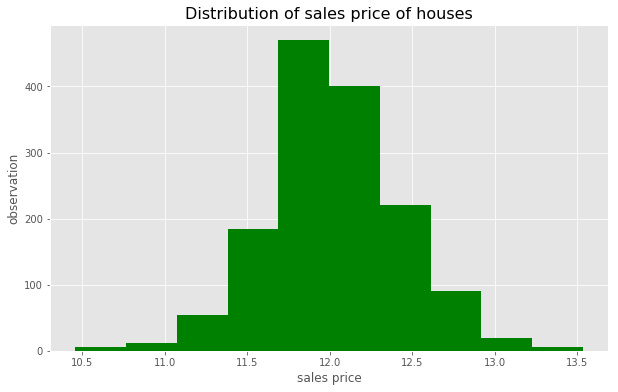

In [14]:
#analysing the guassian distribution of sale price 
print('skew is', train.SalePrice.skew())   
plt.hist(target_variable, color= 'g')

plt.title('Distribution of sales price of houses', fontsize = 16)
plt.ylabel('observation', fontsize = 12)
plt.xlabel('sales price', fontsize = 12)

plt.show()

In [16]:
#0Fetchng the datatype of numberic columns
numeric_values = train.select_dtypes(include = [np.number])
numeric_values.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [17]:
#features with the most correlation with the predictor variable
corr = numeric_values.corr()
print(corr['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [18]:
#unique values in overall quality
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [20]:
#Since Overall Quality has the autocorrelation value with sale price let's pivot table of Overall Quality & Sale price
QualityVsSales = train.pivot_table(index= 'OverallQual', values= 'SalePrice')

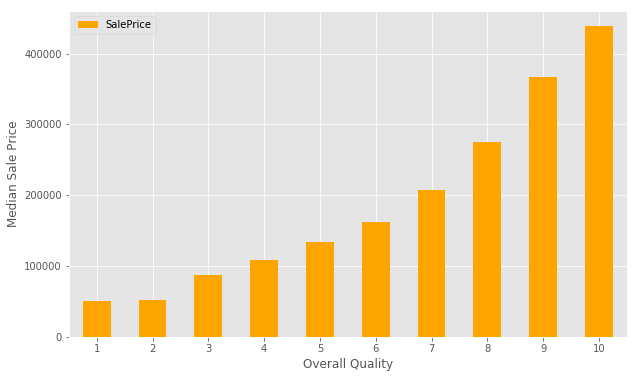

In [21]:
#plotting the pivot table
QualityVsSales.plot(kind = 'bar', color = 'Orange')

plt.xlabel('Overall Quality', fontsize = 12)
plt.ylabel('Median Sale Price', fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

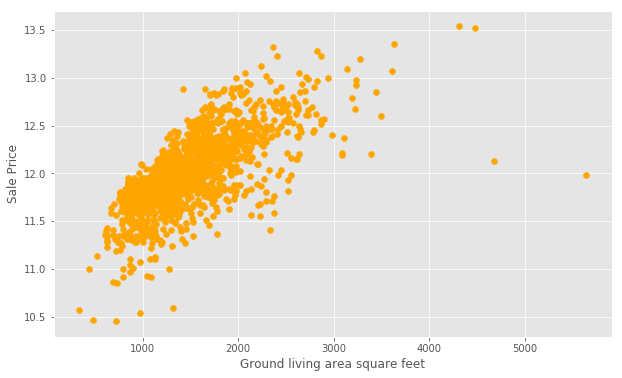

In [22]:
#Relation between Sale price and Ground Area
plt.scatter(x = train['GrLivArea'], y = target_variable, color = 'orange')
plt.xlabel('Ground living area square feet', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.show()

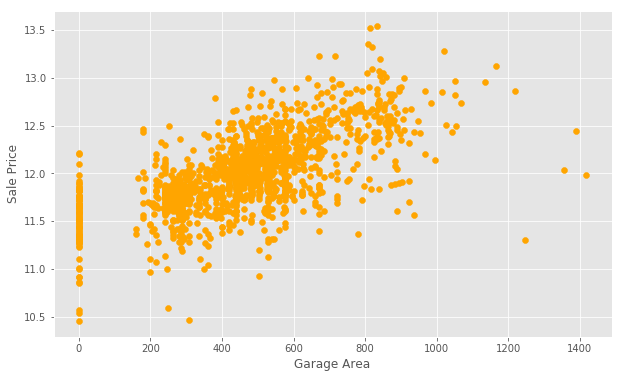

In [23]:
#Relation between Sale price and Garage area
plt.scatter(x = train['GarageArea'], y = target_variable, color = 'orange')

plt.xlabel('Garage Area', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.show()

In [24]:
#Based on the above graph, we could see that outliers exists. For better understanding the relation, let's remove the outliers
train = train[train['GarageArea'] < 1100]

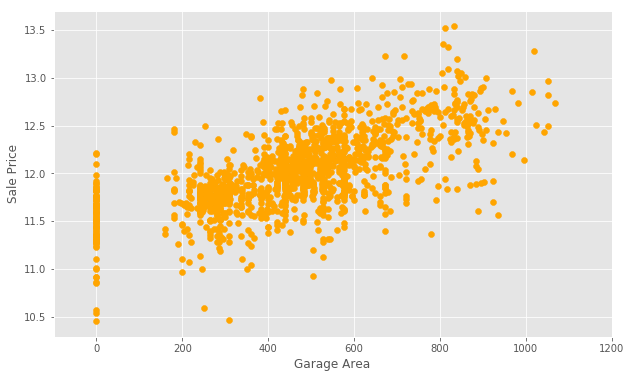

In [25]:
plt.scatter(x = train['GarageArea'], y = np.log(train.SalePrice), color = 'orange')
plt.xlim(-100, 1200)
plt.xlabel('Garage Area', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.show()

In [26]:
#Null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Columns'
nulls[:5]

,Null Count
Columns,
PoolQC,1447
MiscFeature,1400
Alley,1362
Fence,1172
FireplaceQu,689


In [27]:
#analysing the categorical data
categorical_variables= train.select_dtypes(exclude= [np.number])
categorical_variables.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1453,1453,91,1453,1453,1453,1453,1453,1453,1453,...,1372,1372,1372,1372,1453,6,281,53,1453,1453
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1145,1448,50,921,1307,1452,1048,1376,225,1256,...,865,605,1304,1319,1333,2,157,48,1266,1196


In [28]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1448
Grvl       5
Name: Street, dtype: int64 



In [29]:
#One-hot encoding to convert the categorical data into integer data
train['enc_street'] = pd.get_dummies(train.Street, drop_first= True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first= True)

In [30]:
print('Encoded: \n')
print(train.enc_street.value_counts())

Encoded: 

1    1448
0       5
Name: enc_street, dtype: int64


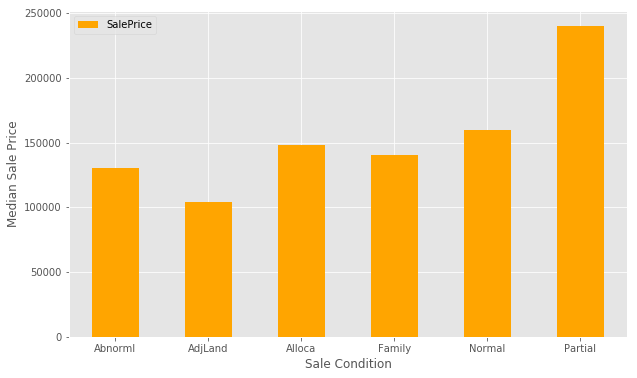

In [31]:
#Sales Condition vs SalePrice
SaleConditionVSSalePrice = train.pivot_table(index= 'SaleCondition', values= 'SalePrice', aggfunc= np.median)

SaleConditionVSSalePrice.plot(kind= 'bar', color = 'orange')
plt.xlabel('Sale Condition', fontsize = 12)
plt.ylabel('Median Sale Price', fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

In [32]:
def encode(x): 
    if x == 'Partial':
        return 1
    else:
        return 0

In [33]:
#Treating partial as one class and other all sale condition as other
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

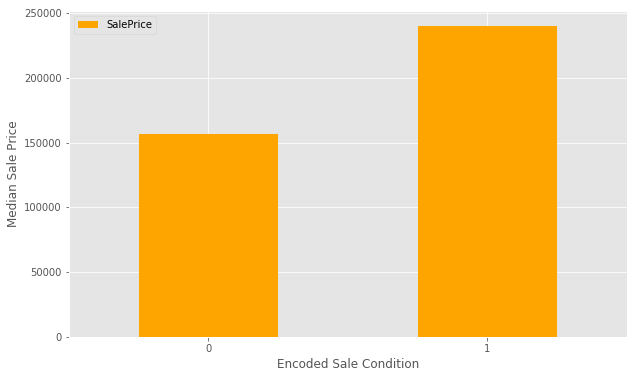

In [34]:
SaleConditionVSSalePrice = train.pivot_table(index= 'enc_condition', values= 'SalePrice', aggfunc= np.median)

SaleConditionVSSalePrice.plot(kind= 'bar', color = 'orange')
plt.xlabel('Encoded Sale Condition', fontsize = 12)
plt.ylabel('Median Sale Price', fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

In [35]:
#Handling the missing values by interpolation
data = train.select_dtypes(include= [np.number]).interpolate().dropna()

In [38]:
#Verifying missing values
sum(data.isnull().sum() != 0)

0

In [39]:
#log transforming the target variable to improve the linearity of the regression
y = np.log(train.SalePrice)
#dropping the target variable and the index from the training set
X = data.drop(['SalePrice', 'Id'], axis = 1)

In [40]:
#splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)

In [41]:
#Linear regression model
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()

In [43]:
#fitting linear regression on the data
model = linear_regression.fit(X_train, y_train)

In [44]:
#R square value
print('R square is: {}'.format(model.score(X_test, y_test)))

R square is: 0.8540960549266087


In [45]:
#Prediciting R square on test
predictions = model.predict(X_test)

In [46]:
#Evaluation of mean squared error
from sklearn.metrics import mean_squared_error, accuracy_score
print('RMSE is {}'.format(mean_squared_error(y_test, predictions)))

RMSE is 0.025087997944532654


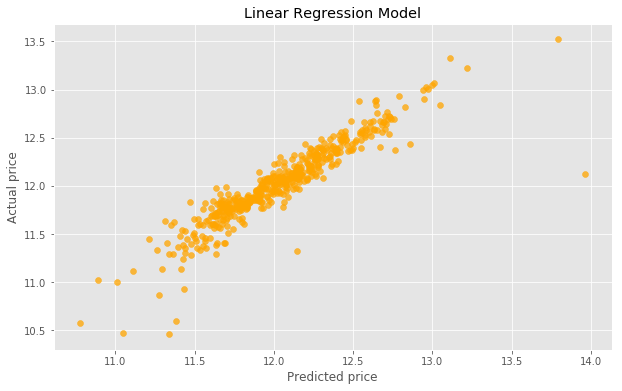

In [47]:
Actual_Price = y_test
plt.scatter(predictions, Actual_Price, alpha= 0.75, color = 'orange')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

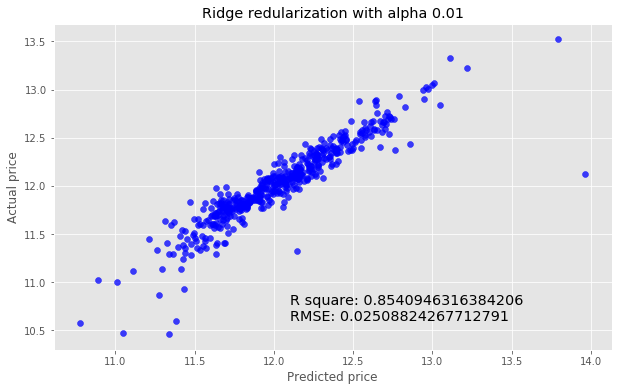

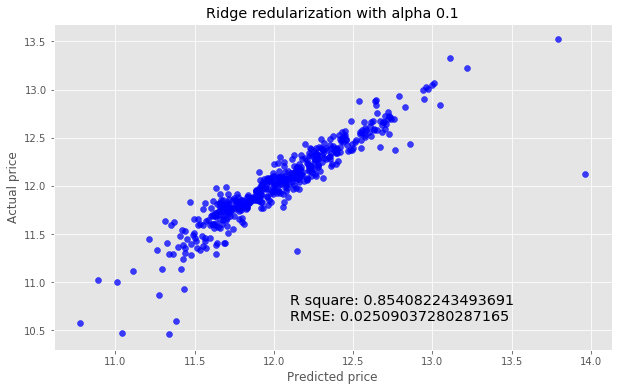

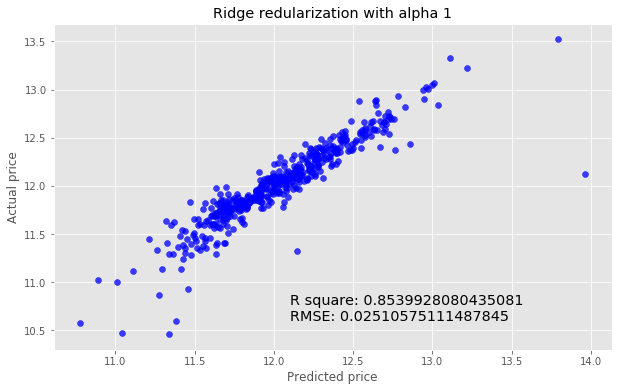

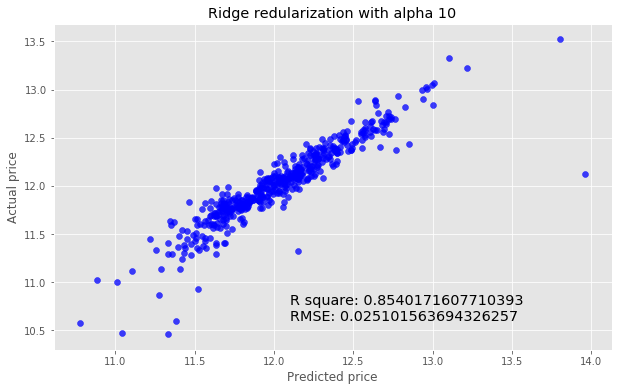

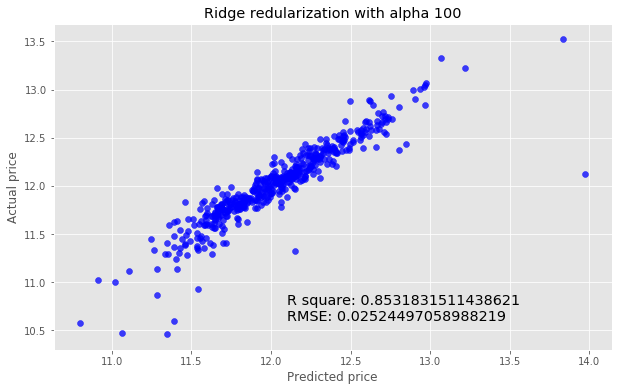

In [48]:
#Linear regression with L2 regularization
for i in range(-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha = alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, y_test, alpha= 0.75, c= 'b')
    plt.xlabel('Predicted price')
    plt.ylabel('Actual price')
    plt.title('Ridge redularization with alpha {}'.format(alpha))
    overlay = 'R square: {} \nRMSE: {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s = overlay, xy = (12.1, 10.6), size = 'x-large')
    plt.show()